<a href="https://colab.research.google.com/github/jayashri17092002/scaling-octo-lamp/blob/main/intrusion%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import time
from statistics import mode

0 BENIGN
3 DoS         
6 WebAttack    
1 Bot       
5 PortScan
2 BruteForce  
4 Infiltration  bold text

In [3]:
df = pd.read_csv("CICIDS2017.csv")
df.Label.value_counts()
X = df.drop(['Label'],axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0) #shuffle=False
pd.Series(y_train).value_counts()

6    1744
1    1568
3      99
0      92
5      48
4      31
2      15
Name: Label, dtype: int64

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027937 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14892
[LightGBM] [Info] Number of data points in the train set: 5551, number of used features: 62
[LightGBM] [Info] Start training from score -4.099945
[LightGBM] [Info] Start training from score -1.264177
[LightGBM] [Info] Start training from score -1.713978
[LightGBM] [Info] Start training from score -4.026614
[LightGBM] [Info] Start training from score -1.713978
[LightGBM] [Info] Start training from score -4.750532
[LightGBM] [Info] Start training from score -1.157797
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

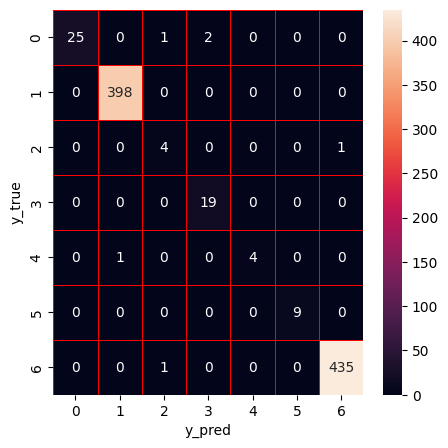

CPU times: user 6.48 s, sys: 81.1 ms, total: 6.56 s
Wall time: 7.48 s


In [25]:
%%time
# Train the LightGBM algorithm
import lightgbm as lgb
lg = lgb.LGBMClassifier()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy of LightGBM: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of LightGBM: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of LightGBM: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of LightGBM: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of LightGBM for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
lg_f1=f1_score(y_test, y_pred, average=None)


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       1.00      1.00      1.00       398
           2       1.00      1.00      1.00         5
           3       0.95      1.00      0.97        19
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00       436

    accuracy                           1.00       900
   macro avg       0.99      0.97      0.98       900
weighted avg       1.00      1.00      1.00       900

Accuracy of XGBoost: 0.9977777777777778
Precision of XGBoost: 0.9978333333333332
Recall of XGBoost: 0.9977777777777778
Average F1 of XGBoost: 0.997730294396961
F1 of XGBoost for each type of attack: [0.96428571 1.         1.         0.97435897 0.88888889 1.
 1.        ]


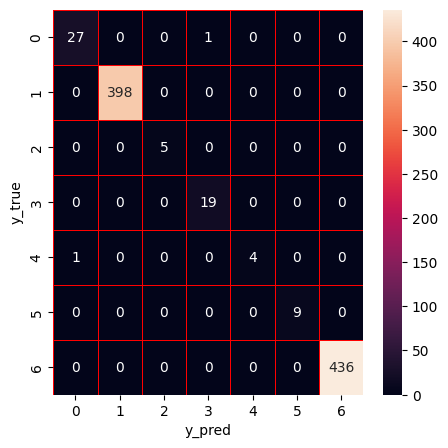

CPU times: user 3.44 s, sys: 101 ms, total: 3.54 s
Wall time: 3.73 s


In [5]:
%%time
# Train the XGBoost algorithm
import xgboost as xgb
xg = xgb.XGBClassifier()

X_train_x = X_train.values
X_test_x = X_test.values

xg.fit(X_train_x, y_train)

y_pred = xg.predict(X_test_x)
print(classification_report(y_test,y_pred))
print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of XGBoost: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of XGBoost for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
xg_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.89      0.93        28
           1       1.00      1.00      1.00       398
           2       1.00      0.80      0.89         5
           3       0.86      1.00      0.93        19
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00       436

    accuracy                           0.99       900
   macro avg       0.97      0.93      0.95       900
weighted avg       0.99      0.99      0.99       900

Accuracy of Random Forest: 0.9944444444444445
Precision of Random Forest: 0.9948160624018748
Recall of Random Forest: 0.9944444444444445
Average F1 of Random Forest: 0.9943612707222911
F1 of Random Forest for each type of attack: [0.92592593 1.         0.88888889 0.92682927 0.88888889 1.
 0.99885452]


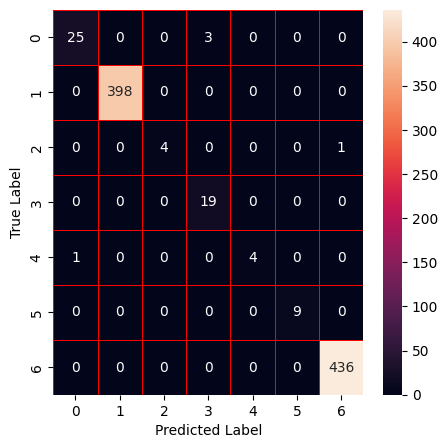

CPU times: user 959 ms, sys: 110 ms, total: 1.07 s
Wall time: 956 ms


In [7]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Random Forest algorithm
rf = RandomForestClassifier()
X_train_x = X_train.values
X_test_x = X_test.values

rf.fit(X_train_x, y_train)

y_pred = rf.predict(X_test_x)



# Evaluate the performance
print(classification_report(y_test, y_pred))
print("Accuracy of Random Forest: " + str(accuracy_score(y_test, y_pred)))
print("Precision of Random Forest: " + str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of Random Forest: " + str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of Random Forest: " + str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of Random Forest for each type of attack: " + str(f1_score(y_test, y_pred, average=None)))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [18]:
from imblearn.over_sampling import ADASYN

# Initialize ADASYN with desired parameters
adasyn = ADASYN(sampling_strategy={2: 1000, 4: 1000}, n_jobs=-1)

# Oversample the minority classes in the training data
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)
pd.Series(y_train_resampled).value_counts()

6    1744
1    1568
4    1000
2    1000
3      99
0      92
5      48
Name: Label, dtype: int64

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        28
           1       1.00      1.00      1.00       398
           2       0.67      0.80      0.73         5
           3       0.86      1.00      0.93        19
           4       1.00      1.00      1.00         5
           5       0.90      1.00      0.95         9
           6       1.00      1.00      1.00       436

    accuracy                           0.99       900
   macro avg       0.92      0.95      0.93       900
weighted avg       0.99      0.99      0.99       900

Accuracy of Random Forest: 0.9922222222222222
Precision of Random Forest: 0.9931556948798329
Recall of Random Forest: 0.9922222222222222
Average F1 of Random Forest: 0.9923520746790151
F1 of Random Forest for each type of attack: [0.92307692 1.         0.72727273 0.92682927 1.         0.94736842
 0.99655568]


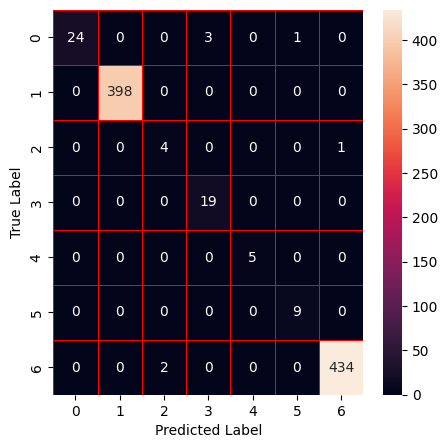

CPU times: user 2.02 s, sys: 93.3 ms, total: 2.11 s
Wall time: 2.13 s


In [19]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Random Forest algorithm
rf = RandomForestClassifier()
X_train_x = X_train_resampled.values
X_test_x = X_test.values

rf.fit(X_train_x, y_train)

y_pred = rf.predict(X_test_x)



# Evaluate the performance
print(classification_report(y_test, y_pred))
print("Accuracy of Random Forest: " + str(accuracy_score(y_test, y_pred)))
print("Precision of Random Forest: " + str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of Random Forest: " + str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of Random Forest: " + str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of Random Forest for each type of attack: " + str(f1_score(y_test, y_pred, average=None)))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       1.00      1.00      1.00       398
           2       0.71      1.00      0.83         5
           3       0.95      1.00      0.97        19
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00       436

    accuracy                           1.00       900
   macro avg       0.95      0.96      0.95       900
weighted avg       1.00      1.00      1.00       900

Accuracy of XGBoost: 0.9955555555555555
Precision of XGBoost: 0.9962488164856587
Recall of XGBoost: 0.9955555555555555
Average F1 of XGBoost: 0.9956521643185043
F1 of XGBoost for each type of attack: [0.96296296 0.99874529 0.83333333 0.97435897 0.88888889 1.
 0.99885189]


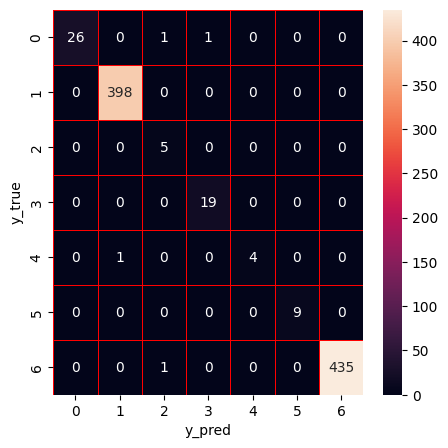

CPU times: user 3.73 s, sys: 132 ms, total: 3.87 s
Wall time: 2.15 s


In [20]:
%%time
# Train the XGBoost algorithm
import xgboost as xgb
xg = xgb.XGBClassifier()

X_train_x = X_train_resampled.values
X_test_x = X_test.values

xg.fit(X_train_x, y_train)

y_pred = xg.predict(X_test_x)
print(classification_report(y_test,y_pred))
print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of XGBoost: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of XGBoost for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
xg_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14892
[LightGBM] [Info] Number of data points in the train set: 5551, number of used features: 62
[LightGBM] [Info] Start training from score -4.099945
[LightGBM] [Info] Start training from score -1.264177
[LightGBM] [Info] Start training from score -1.713978
[LightGBM] [Info] Start training from score -4.026614
[LightGBM] [Info] Start training from score -1.713978
[LightGBM] [Info] Start training from score -4.750532
[LightGBM] [Info] Start training from score -1.157797
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

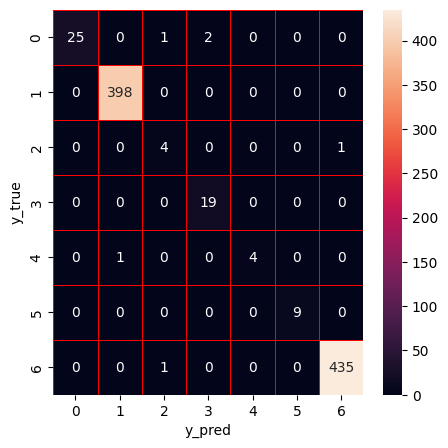

CPU times: user 4.71 s, sys: 92 ms, total: 4.81 s
Wall time: 4.84 s


In [24]:
%%time
# Train the LightGBM algorithm
import lightgbm as lgb
lg = lgb.LGBMClassifier()

X_train_lgb = X_train_resampled.values
X_test_lgb = X_test.values

lg.fit(X_train_lgb, y_train)

y_pred = lg.predict(X_test_lgb)
print(classification_report(y_test, y_pred))
print("Accuracy of LightGBM: " + str(accuracy_score(y_test, y_pred)))
print("Precision of LightGBM: " + str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of LightGBM: " + str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of LightGBM: " + str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of LightGBM for each type of attack: " + str(f1_score(y_test, y_pred, average=None)))
lg_f1 = f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
